antall samples 7438
the fundemental frequency is 177.77777777777806


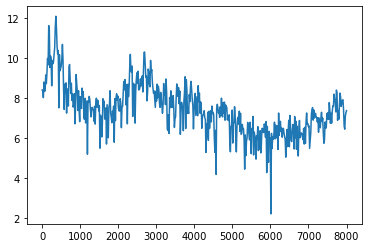

11.612819231744407
the fundamental frequency is 171.875


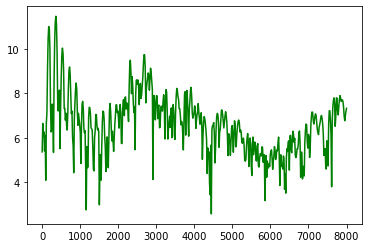

the difference between the two spectra is that the one that is multiplied with hamming window is improved the fft results
indexen er 359.375
the fundemental frequency for when we apply the hammingwindow is 343.75


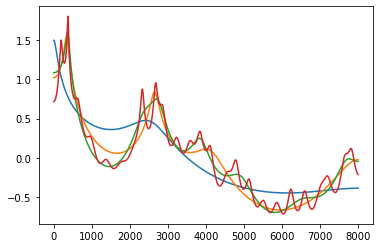

<ipython-input-127-65452d1f0752>:119: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))


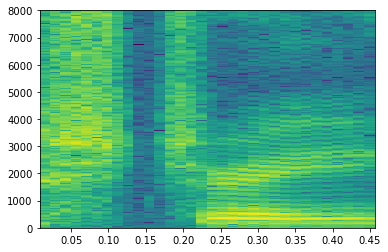

In [127]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
from matplotlib.pyplot import plot
from pydub import AudioSegment, effects
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import wave
import sys
import matplotlib.colors
#import scipy.signal.hamming as ham
import pysptk
Fs, data = scipy.io.wavfile.read('stry.wav')
#print(Fs)
#%matplotlib inline


#plot av spekteret
#plt.plot(data)
#plt.show()
antallSamples=len(data)
print("antall samples", antallSamples)
totalTid = len(data)/Fs
time = np.linspace(0,totalTid,antallSamples)

#plot av de siste 40ms
N_40=(totalTid-0.04)*Fs #40*10^-3=0.04
#print(N_40)
#plt.plot(time[int(N_40):],data[int(N_40):])
#plt.show()

#finding the fundemental frequency
maxd1=np.max(data[int(N_40):])
maxd2=np.max(data[int(0.430*Fs):])
indx1=np.where(data[int(N_40):]==maxd1)
indx2=np.where(data[int(0.430*Fs):]==maxd2)
#print(indx1)
#print(indx2)
#print(maxd1)
#print(maxd2)
t1=(43+N_40)*1/Fs
t2=(51+0.430*Fs)/Fs
#print(t2)
F0=1/(t2-t1)
print("the fundemental frequency is", F0)

#normalizing the data
#rawsound=AudioSegment.from_file('stry.wav')
#normalizedsound = effects.normalize(rawsound)
#print("lengden av normalisert data", len(normalizedsound))

#b spectral analysis
N=1024
Ts=1/Fs
fftdata=np.fft.fft(data[int(N_40):],N)
F=np.linspace(0,int(1/(2*Ts)), int(N/2))
plt.plot(F,np.log(abs(fftdata[:int(N/2)])))
plt.show()
maxf1=np.max(np.log(abs(fftdata)))
#print(maxf1)
indxfft1=np.where(np.log(abs(fftdata))==maxf1)
#print(indxfft1[0][0])
f1=(23)*Fs/N
#print(f1)
maxf2=np.max(np.log(abs(fftdata[:indxfft1[0][0]])))
indxfft2=np.where(np.log(abs(fftdata[:indxfft1[0][0]]))==maxf2)
print(maxf2)
print("the fundamental frequency is", indxfft2[0][0]*Fs/N)
f2=11

#hamming window

#ham=np.hamming(N)*fftdata

hammingWindow=np.fft.fft(data[int(N_40):]*np.hamming(len(data[int(N_40):])),N)

plt.plot(F,np.log(abs(hammingWindow[:int(N/2)])),"g")
plt.show()
print("the difference between the two spectra is that the one that is multiplied with hamming window is improved the fft results")
maxhamf1=np.max(np.log(abs(hammingWindow)))
indxfft1=np.where(np.log(abs(hammingWindow))==maxhamf1)
print("indexen er", indxfft1[0][0]*Fs/N)
maxhamf2=np.max(np.log(abs(hammingWindow[:indxfft1[0][0]])))
indxfft2=np.where(np.log(abs(hammingWindow[:indxfft1[0][0]]))==maxhamf2)
print("the fundemental frequency for when we apply the hammingwindow is", indxfft2[0][0]*Fs/N)

#c AR-modeling
#pre-emphasis means HIGH-PASSFILTER
#calculating AR-modeling with order 4
vowelnorm=data[int(N_40):]/np.max(data[int(N_40):])
r4=pysptk.sptk.lpc(vowelnorm, 4)
r4[0]=1
w,h4=scipy.signal.freqz(1,r)
f=np.linspace(0,Fs,N)
plt.plot(f[0:512],np.log10(abs(h4)))
r8=pysptk.sptk.lpc(vowelnorm,8)
r8[0]=1
w,h8=scipy.signal.freqz(1,r8)
f=np.linspace(0,Fs,N)
plt.plot(f[0:512],np.log10(abs(h8)))

r16=pysptk.sptk.lpc(vowelnorm,16)
r16[0]=1
w,h16=scipy.signal.freqz(1,r16)
f=np.linspace(0,Fs,N)
plt.plot(f[0:512],np.log10(abs(h16)))

r50=pysptk.sptk.lpc(vowelnorm,50)
r50[0]=1
w,h50=scipy.signal.freqz(1,r50)
f=np.linspace(0,Fs,N)
plt.plot(f[0:512],np.log10(abs(h50)))
plt.show()

#1d

frequencies, times, spectrogram = scipy.signal.spectrogram(data,Fs,nfft=1024)
plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
plt.show()



#Task 2
#a



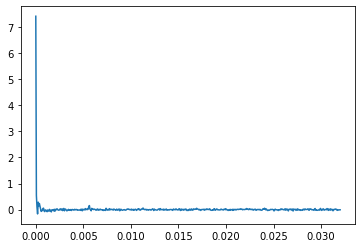

0.1546618184946411
[177.77777778]


In [174]:
from numpy.fft import ifft
vowel=data[int(N_40):]
print()
vowel_fft=np.fft.fft(vowel,N)
vowel_fft_abs=np.abs(vowel_fft)
vowel_fft_abs_log=np.log(vowel_fft_abs)
ceps=ifft(vowel_fft_abs_log,N).real
realF=np.linspace(0,512/Fs,512)
plt.plot(realF,ceps[0:512])
plt.show()

CpeakM=np.max(ceps[12:512])
print(CpeakM)
CindM=np.where(ceps[12:512]==CpeakM)
print(1/((CindM[0]+12)*1/Fs))



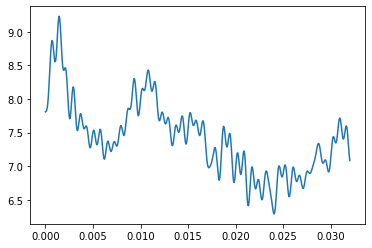

In [175]:
L=int(CindM[0])+12
lifter_cep=np.zeros(512)

for i in range(0,512):
    if i<L:
        lifter_cep[i]=ceps[i]
    else: 
        lifter_cep[i]=0
log_lifter=np.fft.fft(lifter_cep,N).real
plot(realF,log_lifter[:512])
    